In [44]:
import numpy as np                                    
from sklearn import datasets                                                        
from sklearn.linear_model import LinearRegression     
import matplotlib.pyplot as plt
from sklearn import preprocessing      
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()          
X = boston.data                          
y = boston.target  
M, N = X.shape

# standardization :
std_scaler = preprocessing.StandardScaler()
standardized_X = std_scaler.fit_transform(X)
allOnes = np.ones((len(standardized_X), 1))
X = np.hstack([allOnes, standardized_X])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(score(standardized_X2,Y,beta))


#cost function calculator
def cost(X, Y, beta):
  return ((Y - (X @ beta))**2).mean()
# predictor function
def predict(X, beta):
  return X @ beta

# A function that finds the R^2 Statistic).
def score(X, Y, beta):
  Y_predicted = predict(X, beta)
  u = ((Y - Y_predicted)**2).sum()
  v = ((Y - Y.mean())**2).sum()
  return 1 - (u/v)

def adjScore(X, Y, beta,M,N):

  return 1-( (1-score(X,Y,beta) )*(M-1)/(M-N-1))

def Fval(X,Y,beta,M,N):
  Y_predicted = predict(X, beta)
  u = ((Y - Y_predicted)**2).sum()
  v = ((Y - Y.mean())**2).sum()
  if(((u-v)/(N-1))/(u/(M-N)))<0:
    return -((u-v)/(N-1))/(u/(M-N))
  return ((u-v)/(N-1))/(u/(M-N))
# the Batch Gradient Descent function.
def GradientDescent(X, Y, alpha, print_cost = False):
  M, N = X.shape
  # X2 = X.copy()
  # allOnes = np.ones((len(Y), 1))               
  # X2 = np.hstack([allOnes, X2]) # Concatenating the allOnes column to X2(for the intercept value).
  #np.random.seed(0)
  beta = np.random.uniform(-10.0, 10.0, N)
  cost_array = []
  i = 1

  while(True):
    cost_ = cost(X, Y, beta)
    if(len(cost_array)>1 and cost_array[-1] - cost_<0.0000001):
      break
    cost_array.append(cost_)
    if print_cost:
      print("Iteration :", i, '\t', "Cost : " + '%.7f'%cost_)
    i+=1
    beta -= (alpha * (2/M) * (X.T @ (X@beta - Y)))

  return beta, cost_array

# the normal equation function
def normalEqn(X, y):  
    beta = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y) 
    return beta # returns array of predictors  

beta, cost_array = GradientDescent(X_train, y_train, 0.1, False)

r2mine = score(X_test,y_test,beta)
m , n = X_test.shape
ar2mine =adjScore(X_test,y_test,beta,m,n)
fstatmine = Fval(X_test,y_test,beta,m,n)
#print("beta : " , beta)
# beta = normalEqn(X_train, y_train)
# print()
# print("beta : " , beta)
# print("using normal equation: ")
# print()
# print("Cost:" , cost(X_test,y_test,beta))

# print("R^2:" ,score(X_test,y_test,beta))

# print("Adjusted R^2 :" , adjScore(X_test,y_test,beta,m,n))
# print("F-statistic: " , Fval(X_test,y_test,beta,m,n))

regr = LinearRegression()
regr.fit(X_train, y_train)
r2sk = regr.score(X_test,y_test)


model = sm.OLS(y_train,X_train)
results = model.fit()

results.rsquared
#print(results.summary())


0.7552212940758305

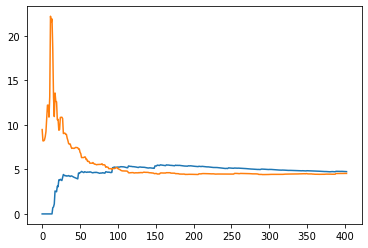

In [45]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curves(m, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    train_errors , test_errors = [],[]
    for i in range (1,len(X_train)):
        m.fit(X_train[:i],y_train[:i])
        y_train_predict= m.predict(X_train[:i])
        y_test_predict = m.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:i],y_train_predict))
        test_errors.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(np.sqrt(train_errors))
    plt.plot(np.sqrt(test_errors))
plot_learning_curves(regr,X,y)

In [46]:
#FINDING BEST LAMBDA
from sklearn.model_selection import KFold
from sklearn import linear_model

cv = KFold(n_splits= 10)
#lambdas = np.arange(110,120,0.1)
lambdas = np.logspace(-4,4,num=100)
LAMBDA = 0
max_score = -100000000
for l in lambdas:
  ridge = linear_model.Ridge( alpha = l )
  tot_score = 0
  for X_train_idx,X_test_idx in cv.split(X):
    X_train = X[X_train_idx]
    y_train = y[X_train_idx]
    X_test =X[X_test_idx]
    y_test = y[X_test_idx]
    ridge.fit(X_train, y_train)
    tot_score += ridge.score(X_test,y_test)
         
  tot_score/=10
        
        
  if tot_score > max_score:
    LAMBDA = l
    max_score = tot_score
print(LAMBDA,max_score)

114.9756995397738 0.3571910583175258


In [47]:
from sklearn.metrics import r2_score
X = boston.data                          
y = boston.target
ridge = linear_model.Ridge(alpha = LAMBDA,fit_intercept = False)
ridge = ridge.fit(X_train,y_train)
ridgescore = r2_score(y_test,ridge.predict(X_test))
m,n = X_test.shape



In [52]:
ridge.coef_

array([17.92386593, -0.36363597,  0.67519596, -0.69641011,  0.84703699,
       -0.71372939,  2.76461417,  0.08406909, -1.54191399,  0.31992062,
       -1.09068608, -1.67741375,  0.57515736, -2.84754266])

In [53]:
beta

array([22.52214734, -0.89295241,  1.16793342,  0.25565516,  0.51881956,
       -1.95145345,  2.39708653,  0.24660848, -3.07081399,  2.5865586 ,
       -2.05117202, -2.20336922,  0.93323522, -4.22172256])

In [54]:
ridge.coef_-beta

array([-4.59828141,  0.52931644, -0.49273747, -0.95206527,  0.32821743,
        1.23772407,  0.36752764, -0.16253939,  1.5289    , -2.26663798,
        0.96048594,  0.52595547, -0.35807785,  1.3741799 ])

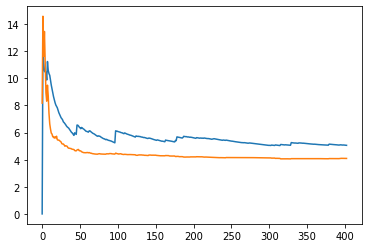

In [25]:
plot_learning_curves(ridge,X,y)


In [56]:
print("R^2: ")
print("ols: " , r2mine , "ridge: " , ridgescore)

R^2: 
ols:  0.6442475385498454 ridge:  -1.0865404748029817


In [55]:
print("adR^2: ")
print("ols: " , ar2mine , "ridge: " , adjridgescore)

adR^2: 
ols:  0.5870000160176366 ridge:  0.36332901941706597


In [57]:
print("F-statistic: ")
print("ols: " , fstatmine , "ridge: " , Fval(X_test,y_test,ridge.coef_,m,n))

F-statistic: 
ols:  12.258693146284351 ridge:  1.4420431097187967
